In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [34]:
df = pd.read_csv("train_values.csv").set_index('building_id')

In [35]:
damages = pd.read_csv("train_labels.csv").set_index('building_id')

# Introduction

In the following blocks I will try to have an insight into the columns : type, mean, number of distinct values...

In [36]:
df.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
desc = pd.DataFrame(index=df.columns)
for c in df.columns:    
    desc.loc[c,'dtype'] = str(type(df.loc[802906,c]))
    desc.loc[c, 'min'] = df[c].min()
    desc.loc[c, 'max'] = df[c].max()
    desc.loc[c, 'distinct'] = df[c].nunique()

In [5]:
desc.to_excel('basic_insights.xlsx')

 # Geo Levels exploration


I will isolate the geo levels columns and work on it. I already know that they are pretty different, because the first level has 31 distincts values, the second has 1414 distincts values and the third has 11595 distinct values.

Description : geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

In [41]:
geo = pd.DataFrame(df.iloc[:,:4])

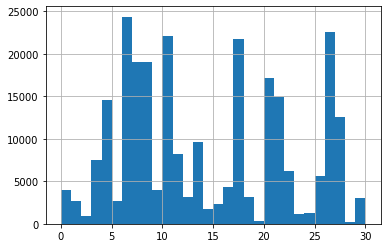

In [42]:
geo.iloc[:,0].hist(bins=30)

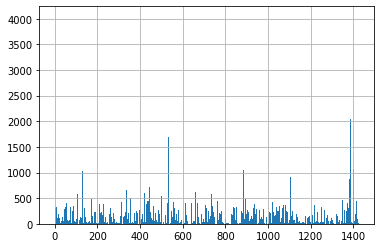

In [92]:
geo.iloc[:,1].hist(bins=1414)

Here we will make sure that geo level 2 is a subdivision of geo level 1

In [142]:
#this dataframe illustrates how many times a certain geo level 1 (columns) is given with a certain geo level 2 (lines)
corr = pd.DataFrame(columns=np.arange(geo.iloc[:,0].max()+1), index=np.arange(geo.iloc[:,1].max()+1))
corr = corr.fillna(0)

for i in range(len(geo.index)):
    corr.iloc[geo.iloc[i,1],geo.iloc[i,0]] += 1 
    print([i, corr.iloc[geo.iloc[i,1],geo.iloc[i,0]]], end="\r")

In [143]:
corr.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,204,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,315,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
#With this line, I will check if every line contains 1 or 2 different values
corr.T.nunique().nunique()

2

So geo level 2 is a subdivision of geo level 1

In [170]:
geo = geo.drop(columns='geo_level_1_id')

Now, let's try the same method on geo level 2 and geo level 3

In [149]:
corr2 = pd.DataFrame(columns=np.arange(geo.iloc[:,0].max()+1), index=np.arange(geo.iloc[:,1].max()+1))
corr2 = corr2.fillna(0)

for i in range(len(geo.index)):
    corr2.iloc[geo.iloc[i,1],geo.iloc[i,0]] += 1 
    print([i, corr2.iloc[geo.iloc[i,1],geo.iloc[i,0]]], end="\r")

In [150]:
corr2.T.nunique().nunique()

2

In [143]:
geo2 = pd.DataFrame(df['geo_level_2_id'])

In [145]:
geo2 = geo2.merge(damages, left_index=True, right_index=True)

In [146]:
geo2

,geo_level_2_id,damage_grade
building_id,,
802906,487,3
28830,900,2
94947,363,3
590882,418,2
201944,131,3
333020,558,2
728451,475,3
475515,323,1
441126,757,2


In [150]:
count = pd.DataFrame(index=geo2['geo_level_2_id'].unique(), columns=[1,2,3,'TOTAL']).fillna(0)

In [155]:
for i in geo2.index[10000:]:
    count.loc[geo2.loc[i,'geo_level_2_id'], geo2.loc[i,'damage_grade']] += 1
    count.loc[geo2.loc[i,'geo_level_2_id'], 'TOTAL'] +=1

In [156]:
count

,1,2,3,TOTAL
487,1,68,201,270
900,2,98,99,199
363,145,557,1058,1760
418,4,175,26,205
131,31,614,393,1038
558,4,182,233,419
475,9,101,28,138
323,188,55,8,251
757,8,248,39,295
886,549,434,70,1053


We come to the same conclusion here : geo level 3 is a subdivision of geo level 2

# Floors, age, area and height exploration

Description : count_floors_pre_eq (type: int): number of floors in the building before the earthquake.

age (type: int): age of the building in years.

area_percentage (type: int): normalized area of the building footprint.

height_percentage (type: int): normalized height of the building footprint

In [3]:
df['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

There are too few buildings with more than 6 floors and we will remove them in preprocessing

In [43]:
df['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

There are too few buildings aged more than 100 years and we will remove them in preprocessing

In [4]:
df['area_percentage'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
4      19236
10     15613
11     13907
3      11837
12      7581
13      5815
14      4162
15      3489
2       3181
16      2606
17      2489
19      1602
18      1317
20      1053
23       865
21       645
24       405
22       391
25       260
26       247
27       240
29       197
28       167
31       144
35       104
       ...  
54         8
77         8
67         8
53         7
56         7
70         7
72         6
65         5
86         5
85         4
61         4
64         4
59         4
63         4
83         3
62         3
73         3
96         3
51         3
84         3
69         2
60         2
76         2
90         1
55         1
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64

In [5]:
df['height_percentage'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

# Land, foundation, roof, ground, other, position, plan

land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.

roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.

ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.

other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

position (type: categorical): position of the building. Possible values: j, o, s, t.

plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

In [6]:
df['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [7]:
df['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [59]:
df['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [65]:
dfm = dfm[dfm.ground_floor_type != 'm']

In [66]:
dfm = dfm[dfm.ground_floor_type != 'z']

In [9]:
df['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [57]:
df['position'].value_counts()*100/len(df.index)

s    77.547669
t    16.460413
j     5.096680
o     0.895238
Name: position, dtype: float64

In [14]:
df['plan_configuration'].value_counts()*100/len(df.index)

d    95.959724
q     2.184182
u     1.400225
s     0.132770
c     0.124712
a     0.096700
o     0.061013
m     0.017652
n     0.014582
f     0.008442
Name: plan_configuration, dtype: float64

# Structure

has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.

has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.

has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.

In [40]:
col = []
for c in df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns:
    col = col + [c[19:]]

In [42]:
struct = pd.DataFrame(columns = col) 

In [55]:
for c in struct.columns:
    struct.loc['%',c] = (df['has_superstructure_'+str(c)].value_counts()*100/len(df.index))[1]

In [56]:
struct

,adobe_mud,mud_mortar_stone,stone_flag,cement_mortar_stone,mud_mortar_brick,cement_mortar_brick,timber,bamboo,rc_non_engineered,rc_engineered,other
%,8.86451,76.1935,3.43322,1.82348,6.8154,7.52683,25.4988,8.50112,4.259,1.58595,1.49846


# Secondary use

In [6]:
col2 = ['has_secondary_use']
for c in df.loc[:,'has_secondary_use_agriculture':'has_secondary_use_other'].columns:
    col2 = col2 + [c[18:]]

In [7]:
secondary = pd.DataFrame(columns = col2) 

In [8]:
secondary.loc['%','has_secondary_use'] = (df['has_secondary_use'].value_counts()*100/len(df.index))[1]
for c in secondary.columns[1:]:
    secondary.loc['%',c] = (df['has_secondary_use_'+str(c)].value_counts()*100/len(df.index))[1]

In [33]:
secondary

,has_secondary_use,agriculture,hotel,rental,institution,school,industry,health_post,gov_office,use_police,other
%,11.188,6.43781,3.36261,0.810051,0.0940135,0.0360705,0.10706,0.0188027,0.0145817,0.00882575,0.511894


In [10]:
damages = pd.read_csv("train_labels.csv").set_index('building_id')

In [11]:
df = df.set_index('building_id')

In [12]:
uses = df.loc[:,'has_secondary_use':'has_secondary_use_other'].merge(damages, left_index=True, right_index=True)

In [13]:
score = pd.DataFrame(index=uses.columns[:-1], columns=[1,2,3]).fillna(0)

In [14]:
for i in uses.index[100000:]:
    for c in uses.columns[:-1]:
        if uses.loc[i,c] == 1:
            score.loc[c, uses.loc[i,'damage_grade']] += 1

In [15]:
score2 = (score.T / score.T.sum()).T

In [16]:
score2

,1,2,3
has_secondary_use,0.148872,0.606042,0.245086
has_secondary_use_agriculture,0.052755,0.635098,0.312147
has_secondary_use_hotel,0.252469,0.577231,0.170300
has_secondary_use_rental,0.426230,0.485842,0.087928
has_secondary_use_institution,0.372671,0.559006,0.068323
has_secondary_use_school,0.305085,0.457627,0.237288
has_secondary_use_industry,0.190789,0.572368,0.236842
has_secondary_use_health_post,0.200000,0.666667,0.133333
has_secondary_use_gov_office,0.321429,0.535714,0.142857
has_secondary_use_use_police,0.166667,0.416667,0.416667


In [17]:
damages['damage_grade'].value_counts()/len(damages)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [122]:
score2.to_excel('ponderate_secondary_use_distribution.xlsx')

In [22]:
other = df.loc[:,'has_secondary_use':]

In [23]:
other.sum()

has_secondary_use                29156
has_secondary_use_agriculture    16777
has_secondary_use_hotel           8763
has_secondary_use_rental          2111
has_secondary_use_institution      245
has_secondary_use_school            94
has_secondary_use_industry         279
has_secondary_use_health_post       49
has_secondary_use_gov_office        38
has_secondary_use_use_police        23
has_secondary_use_other           1334
dtype: int64

# Legal Ownership Status

In [158]:
df['legal_ownership_status'].value_counts()*100/len(df.index)

v    96.292416
a     2.115111
w     1.027241
r     0.565232
Name: legal_ownership_status, dtype: float64

# Count Families

In [162]:
df['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64